In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, transpile, assemble
from qiskit import Aer
from numpy import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Import Successfully")

Import Successfully


## Ideal Simulation

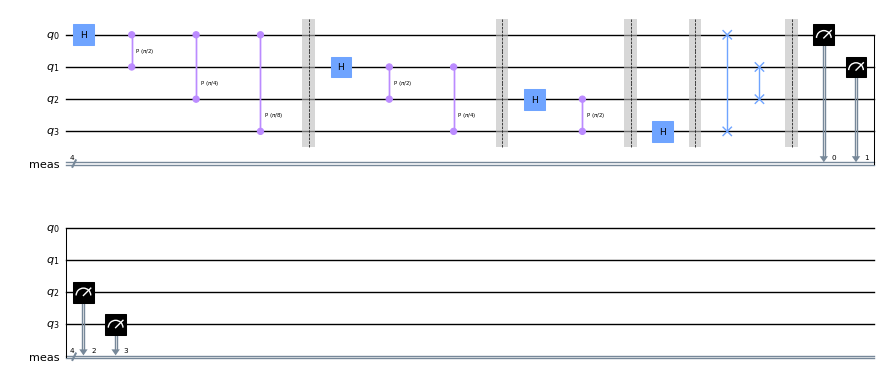

In [21]:
n = 4
qc = QuantumCircuit(n)
for control in range(n):
    qc.h(control)
    if (control != n - 1):
        for target in range(control + 1, n):
            qc.cp(pi/2**(target - control), control, target)
    qc.barrier(x for x in range(n))
qc.swap(0, 3)
qc.swap(1, 2)
qc.measure_all()
qc.draw(output = 'mpl', scale = 0.5)


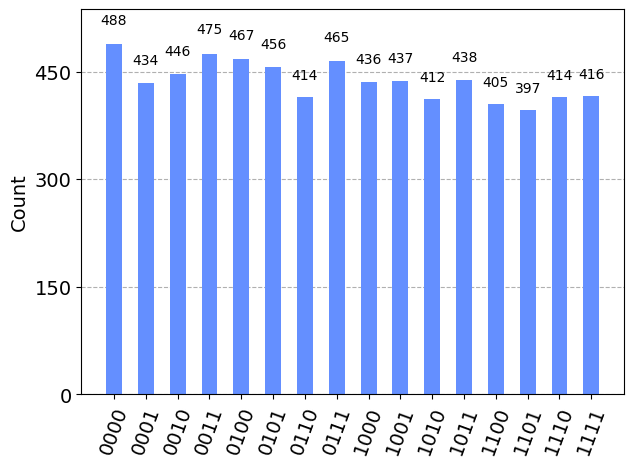

In [47]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 7000).result()
counts = results.get_counts()
plot_histogram(counts)    

## Noisy Simulation 

In [39]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator

In [60]:
p_error = 0.5
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])

In [61]:
bit_flip

QuantumError([(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001F98CB6F670>, 0.5), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001F98CB6DEA0>, 0.5)])

In [62]:
noise_bit_flip = NoiseModel()
#noise_bit_flip.add_all_qubit_quantum_error(bit_flip, "flip")
noise_bit_flip.add_all_qubit_quantum_error(phase_flip, "phase")

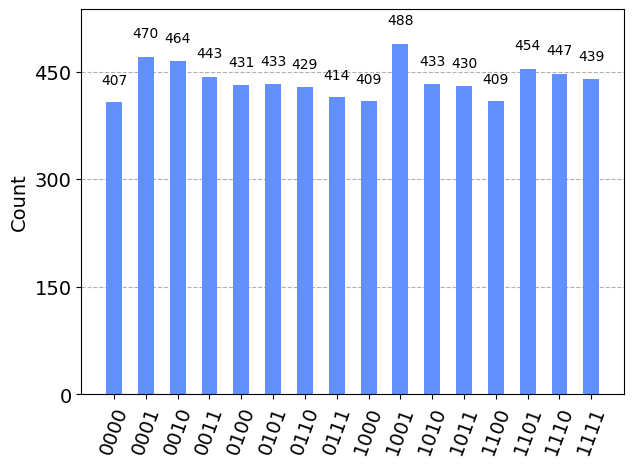

In [63]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(qc, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise, shots = 7000).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)
